In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [10]:
import os
os.getcwd()
os.listdir()

['.git', 'Assignment1.ipynb', 'data', 'README.md']

In [45]:
df = pd.read_csv("data/1- mental-illnesses-prevalence.csv")
df.head()

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815


In [47]:
df.columns = [
    "Entity","Code","Year",
    "Schizophrenia","Depression","Anxiety","Bipolar","Eating_disorders"
]

# Check first rows
print(df.head())
numeric_cols = ["Schizophrenia","Depression","Anxiety","Bipolar","Eating_disorders","Year"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

        Entity Code  Year  Schizophrenia  Depression   Anxiety   Bipolar  \
0  Afghanistan  AFG  1990       0.223206    4.996118  4.713314  0.703023   
1  Afghanistan  AFG  1991       0.222454    4.989290  4.702100  0.702069   
2  Afghanistan  AFG  1992       0.221751    4.981346  4.683743  0.700792   
3  Afghanistan  AFG  1993       0.220987    4.976958  4.673549  0.700087   
4  Afghanistan  AFG  1994       0.220183    4.977782  4.670810  0.699898   

   Eating_disorders  
0          0.127700  
1          0.123256  
2          0.118844  
3          0.115089  
4          0.111815  


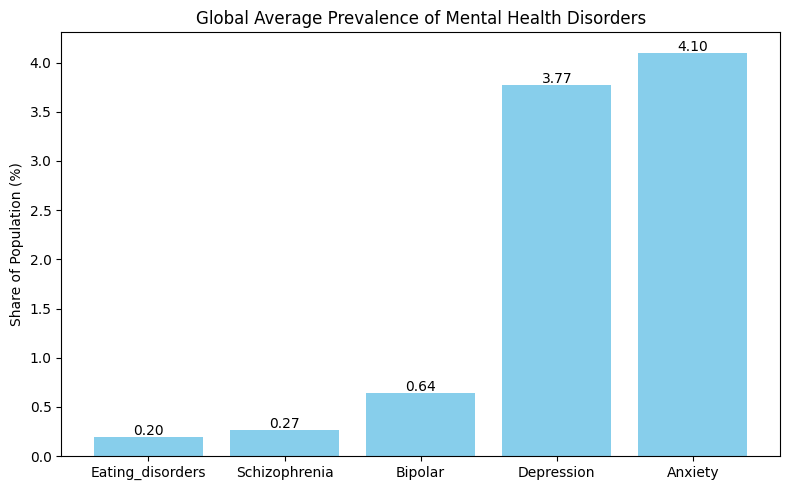

In [48]:
# Compute global average
mean_prevalence = df[["Schizophrenia","Depression","Anxiety","Bipolar","Eating_disorders"]].mean().sort_values()

# Plot
plt.figure(figsize=(8,5))
bars = plt.bar(mean_prevalence.index, mean_prevalence.values, color='skyblue')

# Add labels
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.02, f'{bar.get_height():.2f}', ha='center')

plt.title("Global Average Prevalence of Mental Health Disorders")
plt.ylabel("Share of Population (%)")
plt.tight_layout()
plt.show()


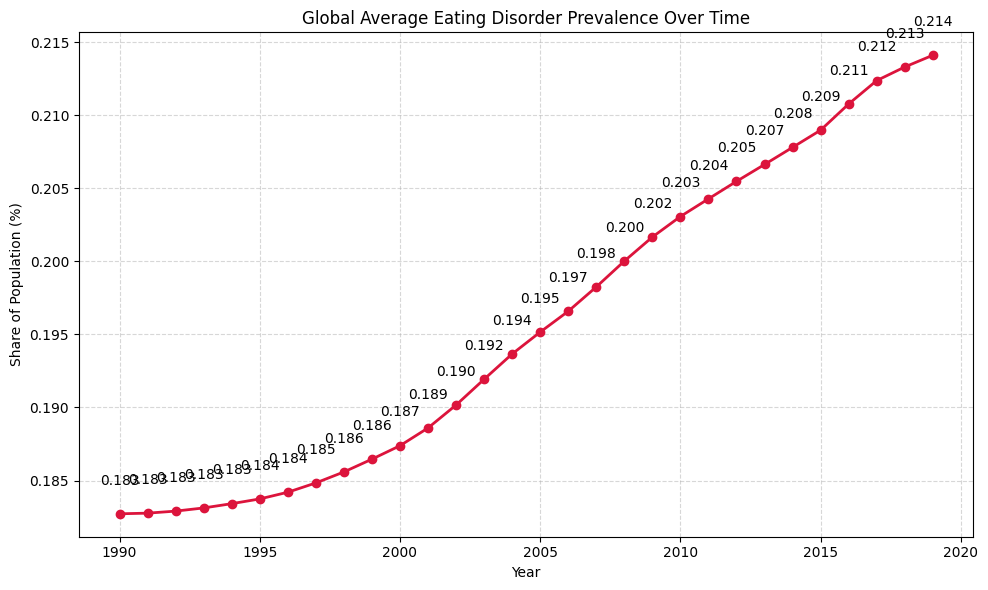

In [52]:
df_yearly = df.groupby("Year")["Eating_disorders"].mean().reset_index()
plt.figure(figsize=(10,6))
plt.plot(df_yearly["Year"], df_yearly["Eating_disorders"], marker='o', color='crimson', linewidth=2)

# Add data labels
for i, val in enumerate(df_yearly["Eating_disorders"]):
    plt.text(df_yearly["Year"].iloc[i], val + 0.002, f"{val:.3f}", ha='center')

plt.title("Global Average Eating Disorder Prevalence Over Time")
plt.xlabel("Year")
plt.ylabel("Share of Population (%)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [55]:
df_sg = pd.read_csv("data/IHME-GBD_2021_DATA-c8d919f7-1.csv")
df_sg.head()

,population_group_id,population_group_name,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,1,All Population,5,Prevalence,69,Singapore,1,Male,6,5-9 years,572,Eating disorders,1,Number,1990,7.960769,16.211203,3.446604
1,1,All Population,5,Prevalence,69,Singapore,2,Female,6,5-9 years,572,Eating disorders,1,Number,1990,13.788137,29.214964,6.184321
2,1,All Population,5,Prevalence,69,Singapore,1,Male,6,5-9 years,572,Eating disorders,1,Number,1991,7.623889,15.695129,3.355900
3,1,All Population,5,Prevalence,69,Singapore,2,Female,6,5-9 years,572,Eating disorders,1,Number,1991,13.337080,28.000975,5.924553
4,1,All Population,5,Prevalence,69,Singapore,1,Male,6,5-9 years,572,Eating disorders,1,Number,1992,7.376912,15.185251,3.293316


In [60]:
age_order = [
    "2-4 years","5-9 years","10-14 years","15-19 years",
    "20-24 years","25-29 years","30-34 years","35-39 years",
    "40-44 years","45-49 years","50-54 years","55+ years"
]

# Convert age_name column to categorical with this order
df_sg['age_name'] = pd.Categorical(df_sg['age_name'], categories=age_order, ordered=True)

# Sort by this categorical order
df_sg = df_sg.sort_values('age_name')

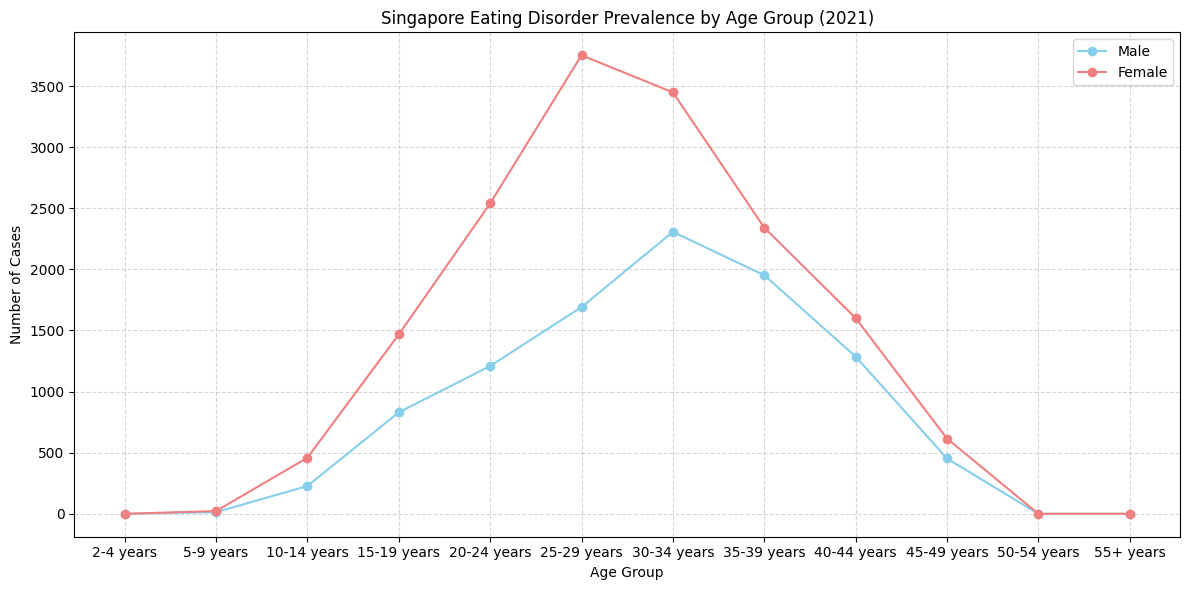

In [61]:
# Ensure columns are lowercase
df_sg.columns = [c.lower() for c in df_sg.columns]

# Filter for Eating disorders in Singapore
df_ed = df_sg[df_sg["cause_name"]=="Eating disorders"]

# Optional: pick the latest year to show current snapshot
latest_year = df_ed["year"].max()
df_latest = df_ed[df_ed["year"]==latest_year]

# Get unique age groups in order
age_groups = df_latest["age_name"].unique()

plt.figure(figsize=(12,6))

# Plot male
df_male = df_latest[df_latest["sex_name"]=="Male"]
plt.plot(age_groups, df_male["val"], marker='o', linestyle='-', color='skyblue', label='Male')

# Plot female
df_female = df_latest[df_latest["sex_name"]=="Female"]
plt.plot(age_groups, df_female["val"], marker='o', linestyle='-', color='lightcoral', label='Female')

# Labels and title
plt.xlabel("Age Group")
plt.ylabel("Number of Cases")
plt.title(f"Singapore Eating Disorder Prevalence by Age Group ({int(latest_year)})")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()